In [57]:
import pandas as pd
import numpy as np
import missingno as msno

In [58]:
data = pd.read_excel("data/complete_dataset.xls")
data.head()

WARNING *** file size (5207429) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,code,gender,age,bmi_t1,spo_t1,cul_t1,alc_t1,nic_t1,veg_t1,rhy10_t1,pmh9_t1,dass_t1,pmh9_t2,dass_t2,FU,ms_t1,CH,match_group,match
0,2002219,1,21.0,20.132348,1,1,0,0,0,25,26,1,21,9,1,0,1,1.322603e+09,9557.0
1,2,0,20.0,20.528922,3,4,1,0,0,44,14,25,18,7,1,0,1,1.127196e+09,9555.0
2,151110900033,0,20.0,20.515086,4,4,3,1,1,40,27,3,99,99,0,0,1,1.127196e+09,9553.0
3,110153320,1,21.0,20.415225,2,4,0,0,0,14,19,1,26,1,1,0,1,1.322603e+09,9552.0
4,171112900048,1,21.0,18.066167,2,2,1,0,0,36,24,2,99,99,0,1,1,1.322603e+09,9551.0


In [4]:
cols = data.columns
print(cols)

Index(['code', 'gender', 'age', 'bmi_t1', 'spo_t1', 'cul_t1', 'alc_t1',
       'nic_t1', 'veg_t1', 'rhy10_t1', 'pmh9_t1', 'dass_t1', 'pmh9_t2',
       'dass_t2', 'FU', 'ms_t1', 'CH', 'match_group', 'match'],
      dtype='object')


In [5]:
wanted_cols  = ("bmi_t1", "spo_t1", "cul_t1", "alc_t1", "nic_t1", "rhy10_t1", "pmh9_t1", "dass_t1", "pmh9_t2", "dass_t2")

In [6]:
data_new = data.loc[:, wanted_cols]
data_new.head()

,bmi_t1,spo_t1,cul_t1,alc_t1,nic_t1,rhy10_t1,pmh9_t1,dass_t1,pmh9_t2,dass_t2
0,20.132348,1,1,0,0,25,26,1,21,9
1,20.528922,3,4,1,0,44,14,25,18,7
2,20.515086,4,4,3,1,40,27,3,99,99
3,20.415225,2,4,0,0,14,19,1,26,1
4,18.066167,2,2,1,0,36,24,2,99,99


In [7]:
wanted_cols  = ["bmi", "physical_activity", "mental_activity", "alcohol", "smoking", "social_rhythm", "positive_mental_score_t1", "negative_mental_score_t1", "positive_mental_score_t2", "negative_mental_score_t2"]

In [8]:
print(len(data_new.columns))
print(len(wanted_cols))

10
10


In [9]:
data_new.columns = wanted_cols

In [10]:
data_new.head()

,bmi,physical_activity,mental_activity,alcohol,smoking,social_rhythm,positive_mental_score_t1,negative_mental_score_t1,positive_mental_score_t2,negative_mental_score_t2
0,20.132348,1,1,0,0,25,26,1,21,9
1,20.528922,3,4,1,0,44,14,25,18,7
2,20.515086,4,4,3,1,40,27,3,99,99
3,20.415225,2,4,0,0,14,19,1,26,1
4,18.066167,2,2,1,0,36,24,2,99,99


In [11]:
data_new.shape

(15365, 10)

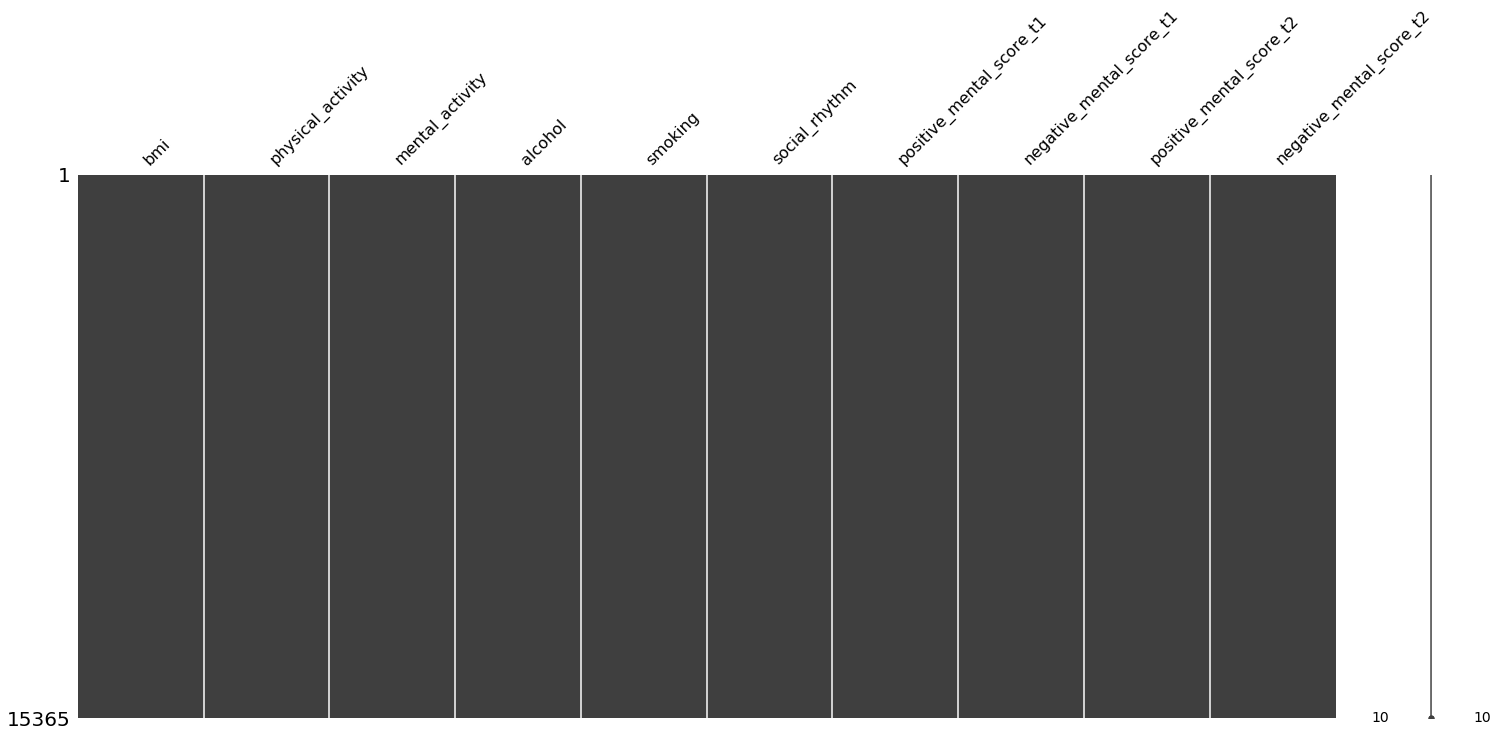

In [12]:
msno.matrix(data_new)

In [13]:
pos_1 = data_new.loc[:, "positive_mental_score_t1"]
pos_2 = data_new.loc[:, "positive_mental_score_t2"]
neg_1 = data_new.loc[:, "negative_mental_score_t1"]
neg_2 = data_new.loc[:, "negative_mental_score_t2"]

In [14]:
def get_composite_score(pos1, pos2, neg1, neg2):
    return pos1**2 + pos2**2 - neg1**2 - neg2**2

In [15]:
print(pos_1.loc[0])
print(pos_2.loc[0])
print(neg_1.loc[0])
print(neg_2.loc[0])

26
21
1
9


In [16]:
get_composite_score(pos_1.loc[0], pos_2.loc[0], neg_1.loc[0], neg_2.loc[0])

1035

In [17]:
composite_scores = []

for i in range(len(pos_1)):
    this_score = get_composite_score(pos_1.loc[i], pos_2.loc[i], neg_1.loc[i], neg_2.loc[i])
    composite_scores.append(this_score)

print(composite_scores[:10])

[1035, -154, 720, 1035, 572, 929, -103, 0, -369, -237]


In [18]:
input_cols  = ("bmi", "physical_activity", "mental_activity", "alcohol", "smoking", "social_rhythm")

In [19]:
data_new.head()

,bmi,physical_activity,mental_activity,alcohol,smoking,social_rhythm,positive_mental_score_t1,negative_mental_score_t1,positive_mental_score_t2,negative_mental_score_t2
0,20.132348,1,1,0,0,25,26,1,21,9
1,20.528922,3,4,1,0,44,14,25,18,7
2,20.515086,4,4,3,1,40,27,3,99,99
3,20.415225,2,4,0,0,14,19,1,26,1
4,18.066167,2,2,1,0,36,24,2,99,99


In [20]:
data_train = data_new.loc[:, input_cols]
data_train["score"] = composite_scores
data_train.head()

,bmi,physical_activity,mental_activity,alcohol,smoking,social_rhythm,score
0,20.132348,1,1,0,0,25,1035
1,20.528922,3,4,1,0,44,-154
2,20.515086,4,4,3,1,40,720
3,20.415225,2,4,0,0,14,1035
4,18.066167,2,2,1,0,36,572


In [21]:
dataset = data_train

In [22]:
!pip install -q seaborn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

In [25]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)


2.5.0


In [26]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

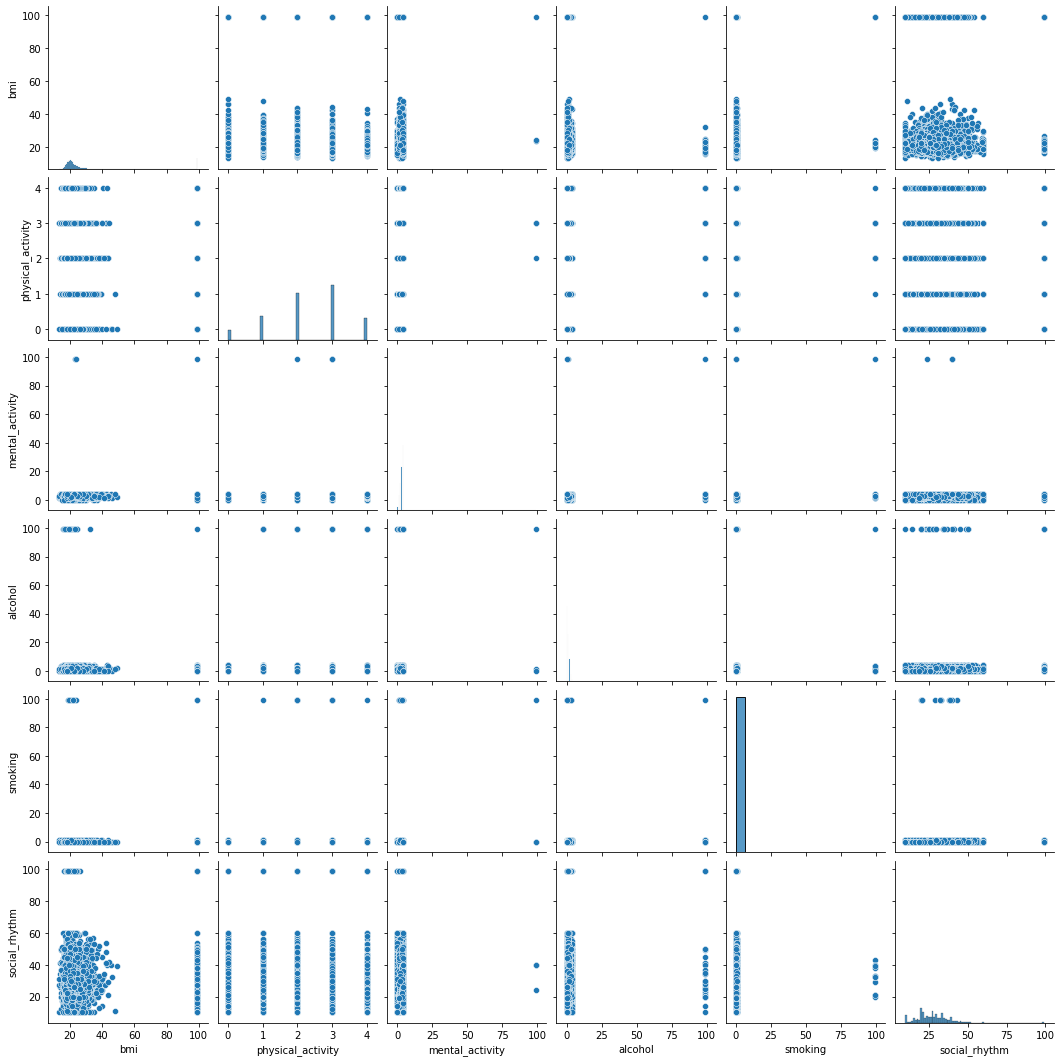

In [27]:
sns.pairplot(train_dataset[['bmi', 'physical_activity', 'mental_activity', 'alcohol', 'smoking', 'social_rhythm']])

In [28]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bmi,12292.0,26.393691,20.039684,12.981524,19.051974,20.700817,23.054562,99.0
physical_activity,12292.0,2.360560,1.081949,0.000000,2.000000,2.000000,3.000000,4.0
mental_activity,12292.0,3.000814,1.860526,0.000000,2.000000,3.000000,4.000000,99.0
alcohol,12292.0,1.033843,4.860213,0.000000,0.000000,1.000000,1.000000,99.0
smoking,12292.0,0.232346,3.231104,0.000000,0.000000,0.000000,0.000000,99.0
social_rhythm,12292.0,27.631793,10.448449,10.000000,20.000000,27.000000,34.000000,99.0
score,12292.0,-9.741458,2073.095033,-12548.000000,-35.000000,416.000000,773.000000,10521.0


In [29]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

In [30]:
train_labels = train_features.pop('score')
test_labels = test_features.pop('score')

In [31]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
bmi,26.393691,20.039684
physical_activity,2.360560,1.081949
mental_activity,3.000814,1.860526
alcohol,1.033843,4.860213
smoking,0.232346,3.231104
social_rhythm,27.631793,10.448449
score,-9.741458,2073.095033


In [32]:
normalizer = preprocessing.Normalization(axis=-1)

In [33]:
normalizer.adapt(np.array(train_features))

In [34]:
print(normalizer.mean.numpy())

[26.394  2.361  3.001  1.034  0.232 27.632]


In [35]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[20.44  0.    4.    2.    1.   35.  ]]

Normalized: [[-0.3  -2.18  0.54  0.2   0.24  0.71]]


In [44]:
linear_model = tf.keras.Sequential([
    normalizer,
    # layers.Dense(64, activation='relu'),
    # layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [46]:
linear_model.predict(train_features[:10])

array([[-1.127],
       [-0.167],
       [-0.8  ],
       [-1.035],
       [ 0.464],
       [ 0.999],
       [ 0.917],
       [ 1.117],
       [ 0.014],
       [-1.033]], dtype=float32)

In [47]:
linear_model.layers[1].kernel

<tf.Variable 'dense_3/kernel:0' shape=(6, 1) dtype=float32, numpy=
array([[-0.324],
       [ 0.172],
       [-0.019],
       [-0.219],
       [-0.627],
       [-0.917]], dtype=float32)>

In [48]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


In [51]:
test_results = {}
test_results['linear_model_before_training'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)
print(test_results)

{'linear_model_before_training': 1025.1160888671875}


In [52]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)


CPU times: user 33.5 s, sys: 2.78 s, total: 36.3 s
Wall time: 41.3 s


In [53]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1000])
  plt.xlabel('Epoch')
  plt.ylabel('Error []')
  plt.legend()
  plt.grid(True)


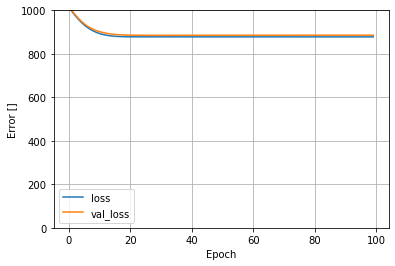

In [54]:
plot_loss(history)

In [55]:
test_results = {}
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)


In [56]:
print(test_results['linear_model'])

873.5317993164062


In [71]:
weights = list(linear_model.layers[1].kernel.numpy())

In [72]:
labels = ['bmi', 'physical_activity', 'mental_activity', 'alcohol', 'smoking', 'social_rhythm']

In [75]:
weights_dict = {labels[i]: float(weights[i]) for i in range(len(weights))}
print(weights_dict)

{'bmi': -22.413082122802734, 'physical_activity': 41.25056838989258, 'mental_activity': 88.95146179199219, 'alcohol': -117.5265121459961, 'smoking': -14.721624374389648, 'social_rhythm': -210.49655151367188}


In [76]:
import json

In [79]:
json_object = json.dumps(weights_dict)  
print(json_object)

{"bmi": -22.413082122802734, "physical_activity": 41.25056838989258, "mental_activity": 88.95146179199219, "alcohol": -117.5265121459961, "smoking": -14.721624374389648, "social_rhythm": -210.49655151367188}


In [80]:
with open("weights.json", "w") as outfile: 
    json.dump(json_object, outfile)